<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/NB14.%20Segmenting%20Breast%20Ultrasound%20Images%20using%20YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmenting Breast Yltrasound Images using YOLOv8

##1. Introduction

## Importance of Ultrasound Imaging in Medicine

Ultrasound imaging is a crucial tool in modern medicine. It uses high-frequency sound waves to create images of the body's internal structures, providing detailed views without the radiation risks associated with other imaging techniques like X-rays or CT scans. Ultrasound is widely used to examine organs, tissues, and blood vessels, and to monitor fetal development during pregnancy.

**Key Importance:**
1. **Non-invasive Diagnostics:** Allows evaluation of various medical conditions without invasive procedures.
2. **Treatment Monitoring:** Helps doctors assess the effectiveness of treatments in real time.
3. **Procedure Guidance:** Used to guide procedures like biopsies or targeted treatments.

For more detailed information, visit [this page from the Radiological Society of North America (RSNA)](https://www.rsna.org/en/patient-care/what-is-ultrasound).

## Applications of AI and Deep Learning in Medical Image Analysis

Artificial Intelligence (AI) and deep learning are transforming the field of medical image analysis. These technologies can assist in several areas:

1. **Automated Detection and Diagnosis:** Algorithms can detect anomalies and diseases with high accuracy, sometimes even outperforming human diagnosticians.
2. **Quantitative Analysis:** Capable of automatically quantifying features in images, such as tumor size, which is crucial for monitoring diseases.
3. **Reduced Diagnosis Time:** Automating certain aspects of image analysis can significantly reduce the time medical professionals spend interpreting images.

For more details on how AI is changing medical image analysis, explore [this article from Nature](https://www.nature.com/articles/s41551-019-0373-7).

## Semantic Segmentation in Medical Imaging

Semantic segmentation is a computer vision technique that involves identifying and classifying each pixel in an image according to the category it belongs to. In medical imaging, this can involve distinguishing between different types of tissues, organs, or identifying specific disease areas.

**Applications in Medicine:**
- **Tumor Delineation:** Precise identification of tumor boundaries.
- **Anatomical Structure Identification:** Separating and labeling different parts of the body in medical images.
- **Tissue Analysis:** Classifying types of tissues for diagnosis and treatment planning.

For further information on semantic segmentation and its applications in medical imaging, you can read [this article from IEEE](https://ieeexplore.ieee.org/document/8673633).

---
**Install Kaggle API Library**

---

In [1]:
%pip install -q kaggle


---
**Upload your Kaggle API Key**

---

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


---
**Copy the API key to `~/.kaggle`**

---

In [3]:
%mkdir -p ~/.kaggle
%cp ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -al ~

total 72
drwx------ 1 root root 4096 Jul 25 07:58 .
drwxr-xr-x 1 root root 4096 Jul 25 07:45 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Jul 23 13:46 .cache
drwxr-xr-x 3 root root 4096 Jul 23 13:46 .config
drwxr-xr-x 5 root root 4096 Jul 23 13:46 .ipython
drwx------ 1 root root 4096 Jul 23 13:46 .jupyter
drwxr-xr-x 2 root root 4096 Jul 25 07:58 .kaggle
drwxr-xr-x 2 root root 4096 Jul 25 07:45 .keras
drwx------ 3 root root 4096 Jul 23 13:13 .launchpadlib
drwxr-xr-x 1 root root 4096 Jul 23 13:46 .local
drwxr-xr-x 4 root root 4096 Jul 23 13:46 .npm
-rw-r--r-- 1 root root  161 Jul  9  2019 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf
-rw-r--r-- 1 root root  211 Jul 23 13:46 .wget-hsts


## [Breast Ultrasound Images dataset](https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset)

Breast cancer is one of the most common causes of death among women worldwide. Early detection helps in reducing the number of early deaths. The data reviews the medical images of breast cancer using ultrasound scan. Breast Ultrasound Dataset is categorized into three classes: normal, benign, and malignant images. Breast ultrasound images can produce great results in classification, detection, and segmentation of breast cancer when combined with machine learning.

### Data

The data collected at baseline include breast ultrasound images among women in ages between 25 and 75 years old. This data was collected in 2018. The number of patients is 600 female patients. The dataset consists of 780 images with an average image size of 500*500 pixels. The images are in PNG format. The ground truth images are presented with original images. The images are categorized into three classes, which are normal, benign, and malignant.

If you use this dataset, please cite:

`Al-Dhabyani W, Gomaa M, Khaled H, Fahmy A. Dataset of breast ultrasound images. Data in Brief. 2020 Feb;28:104863. DOI: 10.1016/j.dib.2019.104863.`

---
**List kaggle datasets with search word 'breast'**

---

In [4]:
!kaggle datasets list -s "breast"

ref                                                              title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
reihanenamdari/breast-cancer                                     Breast Cancer                                   43KB  2022-08-08 19:25:55          21480        277  1.0              
yasserh/breast-cancer-dataset                                    Breast Cancer Dataset                           49KB  2021-12-29 19:07:20          58262        441  1.0              
paultimothymooney/breast-histopathology-images                   Breast Histopathology Images                     3GB  2017-12-19 05:46:40          64501        997  0.75             
imtkaggleteam/breast-cancer                                      Breast Cancer  

---
**Download aryashah2k/breast-ultrasound-images-dataset** (time 6s)

---


In [6]:
%%time
!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset --unzip --force

Dataset URL: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset
License(s): CC0-1.0
 97% 189M/195M [00:01<00:00, 141MB/s]
100% 195M/195M [00:01<00:00, 110MB/s]
CPU times: user 53.2 ms, sys: 7.59 ms, total: 60.8 ms
Wall time: 6.23 s


---
**List directory dataset**

---

In [7]:
# Install Pip Tree globally

!sudo apt install tree -q


!tree --dirsfirst -L 1  "Dataset_BUSI_with_GT"

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (84.7 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 123589 files and directories currently installed.)
Preparing

---
**List type of files in subdirectories**

---

In [9]:
!tree --dirsfirst -L 2  "Dataset_BUSI_with_GT"| head -n 10

Dataset_BUSI_with_GT
├── benign
│   ├── benign (100)_mask_1.png
│   ├── benign (100)_mask.png
│   ├── benign (100).png
│   ├── benign (101)_mask.png
│   ├── benign (101).png
│   ├── benign (102)_mask.png
│   ├── benign (102).png
│   ├── benign (103)_mask.png


## 2. Displaying Images from Dataset

Next code selects a certain number of images from each subdirectory containing images and its masks, displays the images in the subplots using matplotlib.

This approach will allow you to quickly view the images and their masks for each category. If you have a large number of images, you can modify the code to display more images or make other adjustments as needed

---

**Display some images from dataset**

---

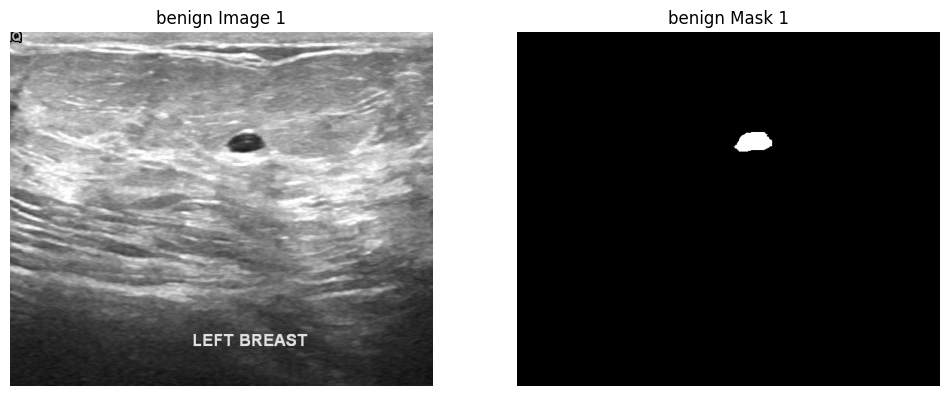

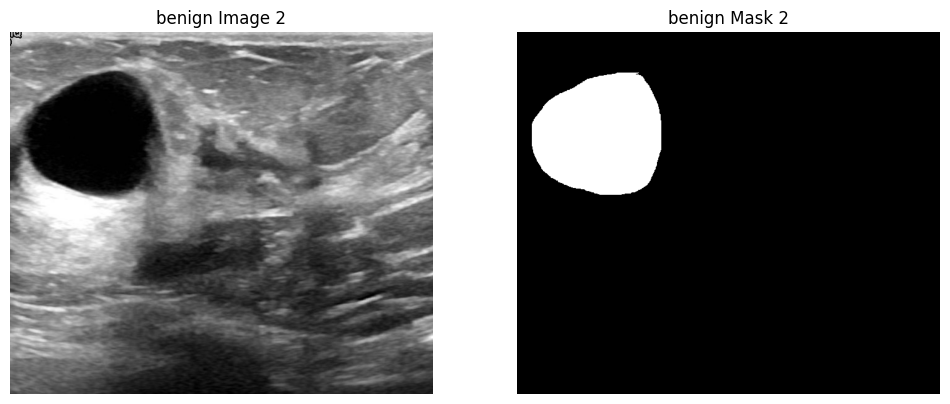

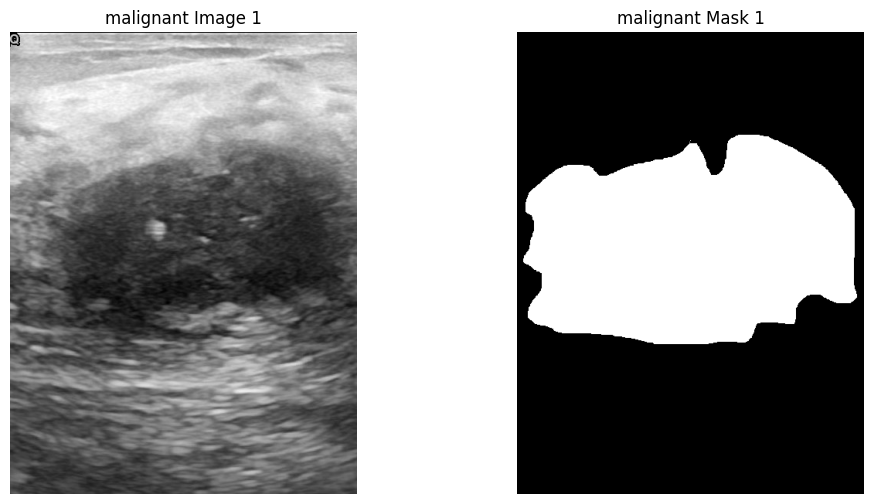

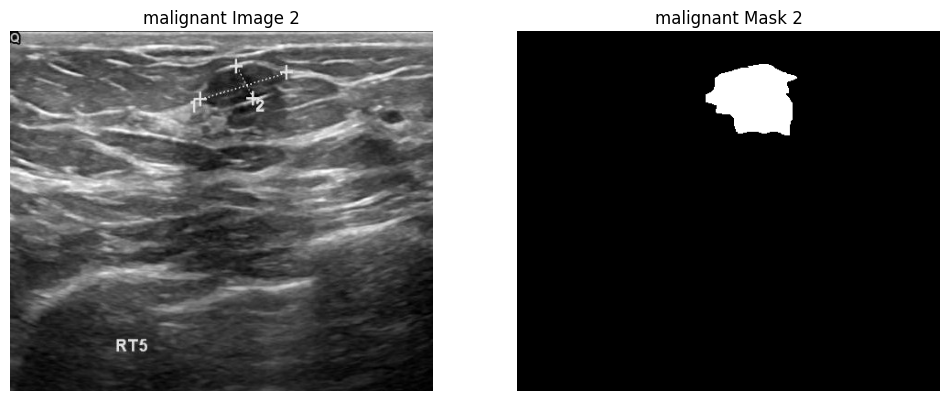

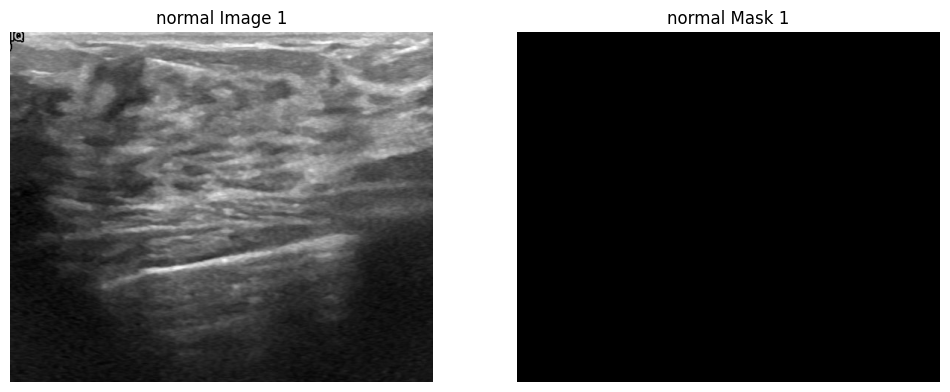

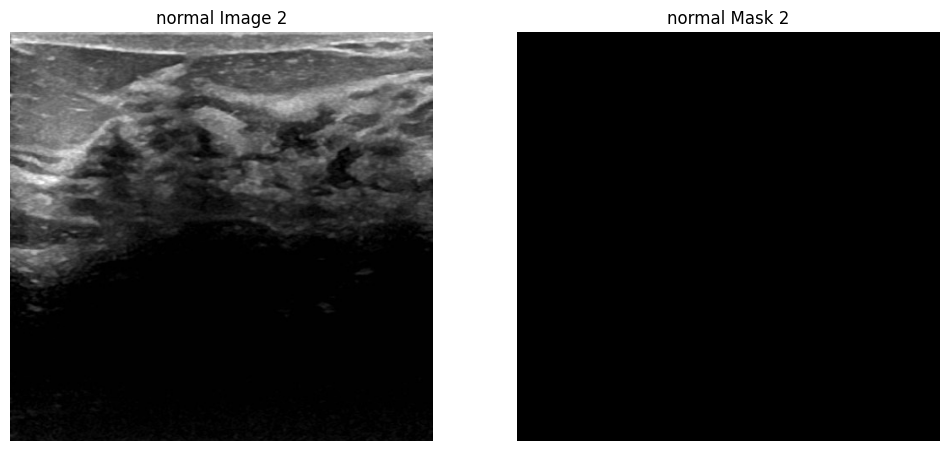

In [24]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the base directory path
base_dir = 'Dataset_BUSI_with_GT'

# Define a function to visualize images and masks
def visualize_images(base_dir, categories):
    for category in categories:
        # Get all image and mask file paths
        image_files = sorted([f for f in os.listdir(os.path.join(base_dir, category)) if f.endswith('.png') and not f.endswith('_mask.png')])
        mask_files = sorted([f for f in os.listdir(os.path.join(base_dir, category)) if f.endswith('_mask.png')])

        # Display first 2 images and masks
        for i in range(2):
            image_path = os.path.join(base_dir, category, image_files[i])
            mask_path = os.path.join(base_dir, category, mask_files[i])

            # Load images
            image = Image.open(image_path)
            mask = Image.open(mask_path)

            # Plot images
            plt.figure(figsize=(12, 6))

            # Plot original image
            plt.subplot(1, 2, 1)
            plt.imshow(image, cmap='gray')
            plt.title(f'{category} Image {i+1}')
            plt.axis('off')

            # Plot mask
            plt.subplot(1, 2, 2)
            plt.imshow(mask, cmap='gray')
            plt.title(f'{category} Mask {i+1}')
            plt.axis('off')

            plt.show()

# Define the categories
categories = ['benign', 'malignant', 'normal']

# Visualize images and masks
visualize_images(base_dir, categories)


##3. Data annotation for YOLOv8

From here I must obtain from all the images that carry `*_mask*.png` a file of annotations `.txt` in format YOLO. the class_index is given by the subdirectory that hangs from `Dataset_BUSI_with_GT`:

```
Dataset_BUSI_with_GT
├── benign
    |- benign (1).png
    |- begningn (1)_mask.png
    |- etc
├── malignant
└── normal
```

### Ultralytics YOLO format:

The dataset label format used for training YOLO segmentation models is as follows:


- One text file per image: Each image in the dataset has a corresponding text file with the same name as the image file and the ".txt" extension.
- One row per object: Each row in the text file corresponds to one object instance in the image.
- Object information per row: Each row contains the following information about the object instance:
- Object class index: An integer representing the class of the object (e.g., 0 for person, 1 for car, etc.).
- Object bounding coordinates: The bounding coordinates around the mask area, normalized to be between 0 and 1.


The format for a single row in the segmentation dataset file is as follows:

```<class-index> <x1> <y1> <x2> <y2> ... <xn> <yn>```


In this format, `<class-index>` is the index of the class for the object, and `<x1> <y1> <x2> <y2> ... <xn> <yn>` are the bounding coordinates of the object's segmentation mask. The coordinates are separated by spaces.

Here is an example of the YOLO dataset format for a single image with two objects made up of a 3-point segment and a 5-point segment.

```
0 0.681 0.485 0.670 0.487 0.676 0.487
1 0.504 0.000 0.501 0.004 0.498 0.004 0.493 0.010 0.492 0.0104
```

---
**import libraries**

---

In [40]:
import os
import cv2
import numpy as np

---
**Define normalize_coordinates Function**

---

In [41]:
def normalize_coordinates(coords, width, height):
    """Normalize coordinates to YOLO format (0 to 1)."""
    return [(x / width, y / height) for x, y in coords]

This function normalizes coordinates to YOLO format (0 to 1) based on the width and height of the image.

---
**Define get_object_boundaries Function**

---

In [42]:
def get_object_boundaries(mask_path):
    """Extract object boundaries from mask image."""
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    boundaries = [contour.squeeze(1).tolist() for contour in contours if len(contour) >= 3]  # Keep only contours with at least 3 points
    return boundaries, mask.shape[1], mask.shape[0]


This function extracts object boundaries from a mask image using OpenCV.

---
**Define save_annotations Function**

---

In [43]:
def save_annotations(image_name, annotations, output_dir):
    """Save annotations in YOLO format to a text file."""
    txt_path = os.path.join(output_dir, image_name.replace('.png', '.txt'))
    with open(txt_path, 'w') as file:
        for annotation in annotations:
            class_idx, boundary = annotation
            boundary_str = ' '.join([f'{x} {y}' for x, y in boundary])
            file.write(f'{class_idx} {boundary_str}\n')


This function saves the annotations in YOLO format to a text file.



---
**Define process_dataset Function**

---

In [48]:
def process_dataset(image_dir, label_dir, output_dir, class_idx):
    """Process the dataset and generate YOLO annotation files."""
    if not os.path.isdir(label_dir):
        raise NotADirectoryError(f'{label_dir} is not a directory.')

    os.makedirs(output_dir, exist_ok=True)

    # Dictionary to hold all annotations for each image
    image_annotations = {}

    for mask_file in os.listdir(label_dir):
        mask_path = os.path.join(label_dir, mask_file)
        if not os.path.isfile(mask_path):
            continue

        if '_mask' in mask_file and mask_file.endswith('.png'):
            boundaries, width, height = get_object_boundaries(mask_path)
            annotations = [(class_idx, normalize_coordinates(boundary, width, height)) for boundary in boundaries]
            image_name = mask_file.split('_mask')[0] + '.png'

            if image_name not in image_annotations:
                image_annotations[image_name] = []

            image_annotations[image_name].extend(annotations)

    # Save all collected annotations
    for image_name, annotations in image_annotations.items():
        save_annotations(image_name, annotations, output_dir)

This function processes the dataset and generates YOLO annotation files.

---
**Define Paths and Class Indices**

---

In [45]:
# Define paths
base_dir = 'Dataset_BUSI_with_GT'
output_base_dir = base_dir

# Define class indices
class_indices = {'benign': 0, 'malignant': 1, 'normal': 2}


In this cell, we define the base directory for the dataset and the class indices.



---
**Process Each Class in the Dataset**

---

In [49]:
# Process each class
for class_name, class_idx in class_indices.items():
    # Paths for images and labels
    image_dir = os.path.join(base_dir, class_name)
    label_dir = os.path.join(base_dir, class_name)
    output_dir = os.path.join(output_base_dir, class_name)

    process_dataset(image_dir, label_dir, output_dir, class_idx)

print("Annotations created successfully")


Annotations created successfully


This cell processes each class in the dataset by calling the process_dataset function.



---
**List type of files in subdirectories**

---

In [50]:
!tree --dirsfirst -L 2  "Dataset_BUSI_with_GT"| head -n 10

Dataset_BUSI_with_GT
├── benign
│   ├── benign (100)_mask_1.png
│   ├── benign (100)_mask.png
│   ├── benign (100).png
│   ├── benign (100).txt
│   ├── benign (101)_mask.png
│   ├── benign (101).png
│   ├── benign (101).txt
│   ├── benign (102)_mask.png


In the case where there are no annotations for an image, it is correct that the .txt annotation file is empty, since there are no objects to annotate. However, if you want every .txt file to have at least the class of the image, even when there are no objects detected, you can modify the script to include an entry in the text file for the class, albeit without coordinates.



## 4. Data Preparation

We want split our data in train, val y test data.

In [51]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define the paths
original_dataset_dir = 'Dataset_BUSI_with_GT'
base_dir = 'BreastUltraSoundImages'

# Define new paths for train, val, and test
image_dir = os.path.join(base_dir, 'images')
label_dir = os.path.join(base_dir, 'labels')
train_image_dir = os.path.join(image_dir, 'train')
val_image_dir = os.path.join(image_dir, 'val')
test_image_dir = os.path.join(image_dir, 'test')
train_label_dir = os.path.join(label_dir, 'train')
val_label_dir = os.path.join(label_dir, 'val')
test_label_dir = os.path.join(label_dir, 'test')

# Create directories if they do not exist
os.makedirs(train_image_dir, exist_ok=True)
os.makedirs(val_image_dir, exist_ok=True)
os.makedirs(test_image_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)
os.makedirs(test_label_dir, exist_ok=True)

# List the classes
classes = ['benign', 'malignant', 'normal']

# Function to copy images and corresponding labels
def copy_images_and_labels(class_name, src_image_dir, src_label_dir, train_image_dst, val_image_dst, test_image_dst,
                           train_label_dst, val_label_dst, test_label_dst, train_ratio=0.7, val_ratio=0.15):
    # List all images in the class
    images = os.listdir(src_image_dir)
    images = [img for img in images if img.endswith('.png')]  # Adjust the extension if needed
    image_paths = [os.path.join(src_image_dir, img) for img in images]
    label_paths = [os.path.join(src_label_dir, img.replace('.png', '.txt')) for img in images]  # Adjust the mask naming convention

    # Split into train, val, and test
    train_images, temp_images, train_labels, temp_labels = train_test_split(
        image_paths, label_paths, train_size=train_ratio, random_state=42)
    val_images, test_images, val_labels, test_labels = train_test_split(
        temp_images, temp_labels, test_size=val_ratio / (val_ratio + (1 - train_ratio)), random_state=42)

    # Copy images and labels
    for img, label in zip(train_images, train_labels):
        if os.path.exists(label):  # Ensure the label file exists before copying
            shutil.copy(img, train_image_dst)
            shutil.copy(label, train_label_dst)

    for img, label in zip(val_images, val_labels):
        if os.path.exists(label):  # Ensure the label file exists before copying
            shutil.copy(img, val_image_dst)
            shutil.copy(label, val_label_dst)

    for img, label in zip(test_images, test_labels):
        if os.path.exists(label):  # Ensure the label file exists before copying
            shutil.copy(img, test_image_dst)
            shutil.copy(label, test_label_dst)

# Copy images and labels for each class
for class_name in classes:
    src_image_dir = os.path.join(original_dataset_dir,class_name)
    src_label_dir = os.path.join(original_dataset_dir, class_name)  # Adjust if masks are in a different directory
    copy_images_and_labels(class_name, src_image_dir, src_label_dir, train_image_dir, val_image_dir, test_image_dir,
                           train_label_dir, val_label_dir, test_label_dir)

print("Dataset reorganized successfully")


Dataset reorganized successfully


In [52]:
!tree --dirsfirst -L 4 --filelimit 10 "BreastUltraSoundImages"

BreastUltraSoundImages
├── images
│   ├── test  [80 entries exceeds filelimit, not opening dir]
│   ├── train  [550 entries exceeds filelimit, not opening dir]
│   └── val  [150 entries exceeds filelimit, not opening dir]
└── labels
    ├── test  [80 entries exceeds filelimit, not opening dir]
    ├── train  [550 entries exceeds filelimit, not opening dir]
    └── val  [150 entries exceeds filelimit, not opening dir]

8 directories, 0 files


Visualiza 5 imagenes y sus mascaras correspondientes para cada clase.

In [ ]:
!pip install -q ultralytics

In [ ]:
#create yaml archive

import yaml

# Contenido del archivo YAML
data = {
    'path': '../BreastUltraSoundImages', # Path to the dataset directory
    'train': 'images/train',
    'val': 'images/val',
    'test': 'images/test',
    'nc': 3,  # Número de clases (benign, malignant, normal)
    'names': {
        0: 'benign',
        1: 'malignant',
        2: 'normal'
    },
}

# Crear y escribir en el archivo blood_cell_cancer.yaml
with open('data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False, allow_unicode=True)

print("Archivo data.yaml creado exitosamente.")

Archivo data.yaml creado exitosamente.


In [ ]:
from ultralytics import YOLO

# Cargar el modelo YOLOv8 para segmentación
model = YOLO('yolov8n-seg.pt')

# Entrenar el modelo
model.train(data='data.yaml', epochs=100, imgsz=640)


Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

train: Scanning /content/BreastUltraSoundImages/labels/train... 535 images, 93 backgrounds, 0 corrupt: 100%|██████████| 535/535 [00:00<00:00, 822.55it/s]

train: New cache created: /content/BreastUltraSoundImages/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/BreastUltraSoundImages/labels/val... 164 images, 25 backgrounds, 0 corrupt: 100%|██████████| 164/164 [00:00<00:00, 370.18it/s]

val: New cache created: /content/BreastUltraSoundImages/labels/val.cache


Plotting labels to runs/segment/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.02G      1.557      3.404        3.6      1.588         13        640: 100%|██████████| 34/34 [00:19<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all        164        139    0.00476      0.889      0.274      0.158    0.00419      0.764      0.266      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.84G      1.384      2.321      2.679      1.442          8        640: 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]


                   all        164        139      0.138     0.0351     0.0754     0.0416      0.138     0.0351      0.074     0.0467

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.69G      1.432      2.311      2.555      1.477         11        640: 100%|██████████| 34/34 [00:15<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]

                   all        164        139      0.238      0.242      0.145     0.0483      0.147      0.135     0.0438       0.02



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.8G      1.373      2.205      2.364      1.434          5        640: 100%|██████████| 34/34 [00:15<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.53it/s]


                   all        164        139     0.0335       0.16     0.0198    0.00589     0.0342      0.191     0.0196    0.00653

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.72G      1.437      2.303      2.282      1.476         10        640: 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all        164        139      0.236       0.45      0.227      0.123      0.657      0.278      0.228      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.69G      1.382      2.224      2.034      1.413         16        640: 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]

                   all        164        139      0.306      0.393      0.322      0.195      0.325        0.4       0.29      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.78G       1.36      2.204      1.971      1.444         16        640: 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all        164        139      0.466      0.376      0.387      0.221      0.466      0.376      0.387      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.75G      1.339      2.113      1.867      1.401         11        640: 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]

                   all        164        139      0.754      0.286      0.336      0.197      0.758      0.291      0.342      0.203



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.72G      1.316      2.143      1.804      1.385         13        640: 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all        164        139      0.717      0.445      0.535      0.332      0.557      0.502      0.549      0.332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.72G      1.289      2.077      1.717      1.401         14        640: 100%|██████████| 34/34 [00:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all        164        139        0.5      0.517      0.498      0.298       0.52      0.534      0.512      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.69G      1.307      2.068      1.717       1.39          8        640: 100%|██████████| 34/34 [00:14<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.62it/s]

                   all        164        139      0.439      0.611      0.586      0.344      0.425      0.604      0.561      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.68G      1.267      2.047      1.661      1.363         14        640: 100%|██████████| 34/34 [00:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all        164        139       0.65      0.545      0.595      0.358      0.633      0.533      0.574      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100       2.7G      1.206      1.974       1.57       1.33         10        640: 100%|██████████| 34/34 [00:13<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]

                   all        164        139      0.612      0.494      0.513      0.333      0.619      0.499      0.504      0.313



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.78G       1.24      2.023      1.566      1.352         16        640: 100%|██████████| 34/34 [00:13<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all        164        139      0.537      0.536      0.587      0.377       0.54      0.541      0.591      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.8G      1.179      1.977      1.478      1.324          8        640: 100%|██████████| 34/34 [00:12<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]

                   all        164        139      0.442      0.489      0.494       0.31      0.449      0.494       0.49        0.3



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.69G      1.191      1.994      1.449      1.305         12        640: 100%|██████████| 34/34 [00:12<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        164        139      0.471      0.571      0.562      0.356      0.531      0.519      0.534      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.8G       1.17      1.924      1.438       1.28         22        640: 100%|██████████| 34/34 [00:12<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.37it/s]

                   all        164        139      0.475      0.652       0.54      0.358      0.488      0.664      0.546      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.76G      1.188      2.016      1.411      1.308         11        640: 100%|██████████| 34/34 [00:12<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]

                   all        164        139      0.643      0.579      0.586      0.383      0.643      0.579      0.585      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.74G      1.159      1.876      1.371      1.282         16        640: 100%|██████████| 34/34 [00:12<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all        164        139      0.625      0.531      0.606      0.387      0.615      0.532      0.602       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.79G      1.152      1.946      1.355      1.284         15        640: 100%|██████████| 34/34 [00:13<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        164        139      0.635      0.589      0.624      0.417      0.635      0.589      0.632      0.411



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.78G      1.179       1.91      1.376      1.299         19        640: 100%|██████████| 34/34 [00:13<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all        164        139      0.674      0.586      0.618      0.413      0.653      0.561      0.609      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100       2.8G      1.102      1.848      1.338       1.27         18        640: 100%|██████████| 34/34 [00:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]

                   all        164        139      0.577      0.553      0.571      0.371      0.588      0.558      0.571      0.363



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.8G       1.13      1.877      1.336      1.265         14        640: 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]

                   all        164        139      0.595      0.578      0.582      0.388      0.588      0.599      0.584      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.76G       1.13      1.865      1.276      1.275         12        640: 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]

                   all        164        139      0.519      0.557      0.528      0.363       0.52      0.559      0.537      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.74G       1.16      1.896      1.289      1.283          9        640: 100%|██████████| 34/34 [00:15<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]

                   all        164        139      0.711      0.612      0.694      0.454      0.706      0.598      0.677      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.7G      1.086      1.784      1.194      1.245         10        640: 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]

                   all        164        139      0.613      0.636      0.636      0.407      0.606      0.629      0.623      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100       2.8G       1.13      1.863      1.204      1.276         11        640: 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all        164        139      0.592      0.605      0.641      0.418      0.575      0.585      0.616      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.76G      1.106      1.843      1.225      1.243         14        640: 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]

                   all        164        139      0.625      0.623      0.629      0.404      0.634      0.628      0.625      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.77G      1.077      1.769      1.187      1.211         13        640: 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.62it/s]

                   all        164        139      0.677      0.586      0.656      0.446      0.697      0.577      0.646      0.418



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.79G      1.076      1.752      1.182      1.216         16        640: 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        164        139      0.569      0.557       0.55      0.378      0.554      0.568      0.545      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.77G        1.1      1.839       1.26      1.251          9        640: 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all        164        139      0.621       0.61      0.607      0.418      0.632      0.594      0.601      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.68G      1.017      1.678      1.141      1.212         11        640: 100%|██████████| 34/34 [00:15<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]

                   all        164        139      0.598      0.697      0.623      0.417      0.599      0.702      0.633      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100       2.8G      1.018      1.691      1.133      1.195         14        640: 100%|██████████| 34/34 [00:14<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        164        139       0.64      0.672       0.65      0.412       0.64      0.672      0.654      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.76G      1.101      1.825      1.185      1.255         15        640: 100%|██████████| 34/34 [00:14<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        164        139      0.593      0.648      0.683      0.457      0.564      0.707       0.69       0.44



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.81G      1.065      1.829      1.123      1.237          9        640: 100%|██████████| 34/34 [00:14<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]

                   all        164        139      0.597       0.58      0.619      0.422      0.587      0.576      0.605      0.401



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.77G      1.059      1.746      1.188      1.239         14        640: 100%|██████████| 34/34 [00:14<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]

                   all        164        139      0.691      0.561      0.617      0.414      0.697      0.566      0.613      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.76G      1.069      1.741      1.099      1.219         13        640: 100%|██████████| 34/34 [00:13<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]

                   all        164        139       0.68      0.596      0.627      0.428      0.688      0.601      0.631      0.405



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100       2.8G      1.039      1.701      1.087      1.218         12        640: 100%|██████████| 34/34 [00:12<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.50it/s]

                   all        164        139      0.666      0.629      0.653      0.448      0.668      0.634      0.654       0.43



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.66G      1.018      1.726      1.062      1.215          7        640: 100%|██████████| 34/34 [00:13<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]


                   all        164        139      0.637      0.629      0.627      0.431      0.613       0.62      0.625      0.402

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.68G     0.9929      1.675      1.083      1.194         16        640: 100%|██████████| 34/34 [00:12<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]

                   all        164        139      0.604      0.678      0.636      0.453       0.61      0.683      0.636      0.435



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.79G     0.9803      1.698       1.03      1.175          9        640: 100%|██████████| 34/34 [00:12<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]

                   all        164        139       0.71      0.686      0.731      0.495      0.715      0.692      0.734      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.79G          1      1.647      1.003      1.196         11        640: 100%|██████████| 34/34 [00:12<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.68it/s]

                   all        164        139      0.617      0.688      0.684      0.454      0.617      0.688      0.679      0.443



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.71G     0.9971       1.67      1.029      1.184          9        640: 100%|██████████| 34/34 [00:13<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all        164        139      0.694      0.711      0.735      0.487        0.7      0.716      0.731      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.79G     0.9932      1.669     0.9884      1.205         14        640: 100%|██████████| 34/34 [00:14<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all        164        139      0.634      0.619      0.668      0.461      0.498       0.72      0.655      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.76G     0.9843      1.646      1.029       1.16         12        640: 100%|██████████| 34/34 [00:14<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]

                   all        164        139      0.675       0.69      0.726       0.48      0.659      0.715      0.718       0.45



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.69G     0.9638      1.603     0.9852      1.159         12        640: 100%|██████████| 34/34 [00:14<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]

                   all        164        139      0.696      0.656      0.705      0.479      0.696      0.656      0.705      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.79G     0.9829      1.635     0.9737      1.176         13        640: 100%|██████████| 34/34 [00:14<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]

                   all        164        139      0.589      0.644      0.628      0.433      0.691      0.586      0.667       0.42



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.81G     0.9492      1.616      0.959       1.15         16        640: 100%|██████████| 34/34 [00:15<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.82it/s]

                   all        164        139      0.575      0.743      0.678      0.449      0.722      0.571      0.673      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.78G     0.9396       1.55     0.9423      1.135          9        640: 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]

                   all        164        139      0.634      0.731      0.682      0.456      0.632      0.731      0.682      0.428



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.77G      0.953      1.597     0.9183      1.168         10        640: 100%|██████████| 34/34 [00:15<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]

                   all        164        139      0.713      0.668      0.741      0.482      0.793      0.591      0.731      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.76G     0.9605      1.556     0.9268       1.16         15        640: 100%|██████████| 34/34 [00:15<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.86it/s]

                   all        164        139       0.69      0.652      0.715      0.489      0.785      0.609      0.713      0.462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.79G     0.9475      1.619      0.987      1.184          7        640: 100%|██████████| 34/34 [00:15<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.69it/s]

                   all        164        139      0.772      0.641      0.727      0.495      0.786      0.644      0.726      0.475



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.69G     0.9111      1.546     0.9213      1.136         11        640: 100%|██████████| 34/34 [00:15<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]

                   all        164        139      0.702      0.719      0.739      0.504      0.723       0.71      0.746      0.472



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.69G     0.8827      1.486     0.8325      1.114          7        640: 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all        164        139      0.822      0.665      0.748      0.503      0.786      0.641      0.726      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.79G     0.8965       1.55     0.8425      1.124          9        640: 100%|██████████| 34/34 [00:14<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all        164        139       0.77      0.631      0.705      0.475      0.744      0.611      0.672      0.454



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.76G     0.8698      1.539     0.8563      1.098         18        640: 100%|██████████| 34/34 [00:14<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all        164        139      0.757      0.632      0.727      0.497      0.782      0.643      0.737       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.68G     0.8801      1.552     0.8606      1.101         12        640: 100%|██████████| 34/34 [00:13<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        164        139      0.686      0.662      0.684      0.476      0.686      0.662      0.681      0.448



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100       2.8G     0.9307      1.551     0.8783      1.131          9        640: 100%|██████████| 34/34 [00:13<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]

                   all        164        139      0.753      0.678       0.75      0.504      0.753      0.678       0.75      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100       2.8G     0.9287      1.518     0.8615      1.142         12        640: 100%|██████████| 34/34 [00:12<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]

                   all        164        139      0.739      0.724      0.755      0.507      0.739      0.724      0.752      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100       2.8G     0.8899      1.475     0.8304      1.136          9        640: 100%|██████████| 34/34 [00:19<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.65it/s]


                   all        164        139      0.784      0.659      0.724      0.512      0.775      0.687      0.727      0.482

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.66G     0.8596      1.452     0.7743      1.097         12        640: 100%|██████████| 34/34 [00:18<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.65it/s]


                   all        164        139      0.715       0.67      0.705       0.51      0.715       0.67       0.71      0.494

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100       2.8G     0.8619      1.504     0.8219      1.093         13        640: 100%|██████████| 34/34 [00:16<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.73it/s]

                   all        164        139      0.706      0.723      0.756      0.515      0.795      0.642      0.751      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.78G     0.8993      1.488     0.8291      1.122         16        640: 100%|██████████| 34/34 [00:15<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

                   all        164        139      0.679        0.7      0.705       0.48      0.671      0.707      0.706      0.466



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.79G     0.8437      1.467     0.7881      1.095         14        640: 100%|██████████| 34/34 [00:16<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        164        139      0.768       0.69      0.752      0.508      0.768       0.69      0.747      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.81G     0.8685      1.515     0.8528      1.105         11        640: 100%|██████████| 34/34 [00:17<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all        164        139      0.708      0.712       0.71      0.494      0.704      0.702      0.709      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.78G     0.8291        1.4     0.7592      1.091         12        640: 100%|██████████| 34/34 [00:16<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]

                   all        164        139      0.703      0.668      0.669      0.468      0.712      0.666      0.668      0.447



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100       2.8G     0.8513      1.439     0.7782      1.095         16        640: 100%|██████████| 34/34 [00:15<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all        164        139      0.737      0.605      0.669      0.482      0.744       0.61      0.678      0.451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.76G     0.8789      1.518      0.841      1.102         11        640: 100%|██████████| 34/34 [00:16<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

                   all        164        139      0.775      0.668      0.734       0.51      0.785      0.678      0.742      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.73G     0.7925      1.382      0.716       1.06          6        640: 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]

                   all        164        139      0.669      0.745      0.733      0.506      0.674       0.75      0.738      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.74G     0.8232      1.425     0.7565      1.084         11        640: 100%|██████████| 34/34 [00:16<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]

                   all        164        139      0.817      0.666       0.74      0.527      0.818      0.666      0.748      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100       2.8G     0.8034      1.387     0.7373      1.071          7        640: 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.66it/s]

                   all        164        139      0.807       0.64       0.77       0.54       0.77      0.689      0.773      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.68G     0.8064      1.397     0.7433      1.074         11        640: 100%|██████████| 34/34 [00:15<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.72it/s]

                   all        164        139      0.681      0.739      0.739       0.52       0.67      0.727       0.73      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.76G     0.7876      1.419     0.7458      1.082         12        640: 100%|██████████| 34/34 [00:15<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all        164        139      0.623      0.708      0.711      0.496      0.628      0.713       0.72      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.68G      0.794      1.386     0.7429      1.079         11        640: 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all        164        139      0.749      0.722      0.745      0.532      0.749      0.722       0.74      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.68G     0.7913      1.415     0.7293       1.07         12        640: 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all        164        139      0.716      0.714      0.728      0.519      0.716      0.714      0.729      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100       2.8G     0.7845      1.386     0.6806      1.077         10        640: 100%|██████████| 34/34 [00:15<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all        164        139      0.739      0.707      0.755      0.514      0.739      0.707      0.757        0.5



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.77G     0.7753      1.359     0.6826      1.059         15        640: 100%|██████████| 34/34 [00:14<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all        164        139      0.766      0.656      0.746      0.521      0.766      0.656      0.752      0.502



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100       2.8G     0.7684      1.429     0.7101      1.053         16        640: 100%|██████████| 34/34 [00:14<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]

                   all        164        139       0.79      0.656      0.742      0.517      0.806      0.668      0.747      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.68G     0.7644      1.361     0.7091      1.042         11        640: 100%|██████████| 34/34 [00:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]

                   all        164        139      0.683      0.724      0.705      0.493      0.683      0.724      0.702      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.79G     0.7926       1.39      0.706      1.065         10        640: 100%|██████████| 34/34 [00:13<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        164        139      0.742      0.639      0.725      0.495      0.759      0.651      0.732      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.68G     0.7749      1.392     0.6789       1.04         15        640: 100%|██████████| 34/34 [00:12<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        164        139      0.745       0.65      0.708      0.501      0.745       0.65      0.714       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.69G     0.7235       1.29     0.6297      1.036         10        640: 100%|██████████| 34/34 [00:12<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]

                   all        164        139      0.693      0.744      0.735      0.516      0.693      0.744       0.74      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.8G     0.8096      1.385     0.6901      1.069         11        640: 100%|██████████| 34/34 [00:12<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]

                   all        164        139       0.72      0.685      0.737      0.514       0.72      0.685      0.734       0.49



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.76G     0.7457      1.345      0.659       1.02         10        640: 100%|██████████| 34/34 [00:12<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]

                   all        164        139      0.698      0.758      0.736      0.524      0.698      0.758      0.739      0.498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.76G     0.7411      1.336       0.65      1.036          9        640: 100%|██████████| 34/34 [00:12<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]

                   all        164        139      0.729      0.751      0.754      0.533       0.73      0.743      0.757      0.509



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.76G     0.7247      1.296      0.648      1.039          8        640: 100%|██████████| 34/34 [00:12<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all        164        139      0.714      0.748      0.737      0.522      0.745      0.692      0.733      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.78G     0.7519      1.355     0.6526      1.033         10        640: 100%|██████████| 34/34 [00:13<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all        164        139      0.747      0.726      0.751      0.534      0.747      0.726      0.755      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.78G     0.7213      1.274     0.6172      1.027         12        640: 100%|██████████| 34/34 [00:13<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]


                   all        164        139      0.721      0.757      0.758      0.529      0.748       0.75      0.762      0.512

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100       2.8G      0.713       1.28     0.6313      1.014         13        640: 100%|██████████| 34/34 [00:13<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all        164        139      0.698      0.735      0.722      0.517        0.7       0.74      0.726      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.8G     0.7412      1.306     0.6451      1.024         11        640: 100%|██████████| 34/34 [00:13<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        164        139      0.747      0.715      0.718      0.512      0.727      0.695       0.71      0.489


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.81G     0.6444      1.189     0.5635      1.014          6        640: 100%|██████████| 34/34 [00:16<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]

                   all        164        139      0.696      0.668      0.675      0.478      0.714      0.686      0.703      0.476



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.67G     0.6022      1.155     0.5073     0.9841          6        640: 100%|██████████| 34/34 [00:11<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.74it/s]

                   all        164        139      0.688      0.739      0.729      0.522      0.693      0.743      0.735      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.67G     0.5929      1.116     0.4542      0.975          7        640: 100%|██████████| 34/34 [00:12<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all        164        139      0.731      0.724       0.73      0.524       0.73      0.725      0.735      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.67G     0.5753       1.09     0.4628     0.9677          7        640: 100%|██████████| 34/34 [00:12<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.77it/s]

                   all        164        139      0.688      0.734      0.731       0.53       0.71      0.744      0.741      0.508



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.67G     0.5931      1.069     0.4662     0.9724          4        640: 100%|██████████| 34/34 [00:13<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.88it/s]

                   all        164        139      0.714      0.759      0.746      0.529      0.713       0.76       0.75      0.506



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.67G     0.5663      1.053      0.445     0.9591          7        640: 100%|██████████| 34/34 [00:15<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        164        139      0.712      0.772      0.749      0.531        0.7      0.774      0.749      0.498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.67G     0.5498      1.045     0.4117     0.9493          6        640: 100%|██████████| 34/34 [00:14<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]

                   all        164        139      0.748      0.714      0.751      0.537      0.748      0.714      0.743      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.67G     0.5612      1.091     0.4423     0.9681          3        640: 100%|██████████| 34/34 [00:14<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all        164        139      0.734      0.714      0.744      0.534      0.734      0.714      0.742       0.51



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.67G     0.5562      1.031     0.4142     0.9472          7        640: 100%|██████████| 34/34 [00:13<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.68it/s]

                   all        164        139      0.728      0.721      0.741      0.532      0.728      0.721      0.742      0.507



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.67G     0.5455      1.064     0.4285     0.9359          7        640: 100%|██████████| 34/34 [00:14<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]

                   all        164        139      0.712      0.756       0.74      0.524      0.712      0.757      0.741      0.505



100 epochs completed in 0.519 hours.
Optimizer stripped from runs/segment/train4/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train4/weights/best.pt, 6.8MB

Validating runs/segment/train4/weights/best.pt...
Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,649 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]


                   all        164        139      0.807       0.64       0.77      0.538      0.768      0.689      0.773      0.524
                benign         98         98      0.872      0.695      0.847      0.643      0.859      0.744      0.843      0.634
             malignant         41         41      0.741      0.585      0.694      0.434      0.678      0.634      0.703      0.415
Speed: 0.3ms preprocess, 3.9ms inference, 0.1ms loss, 5.6ms postprocess per image
Results saved to runs/segment/train4


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f8df878a080>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

In [ ]:
# Realizar predicciones
results = model.predict(source='BreastUltraSoundImages/images/test', save=True)



image 1/81 /content/BreastUltraSoundImages/images/test/benign (114).png: 512x640 1 malignant, 235.4ms
image 2/81 /content/BreastUltraSoundImages/images/test/benign (121).png: 608x640 1 benign, 134.9ms
image 3/81 /content/BreastUltraSoundImages/images/test/benign (127).png: 576x640 1 benign, 127.0ms
image 4/81 /content/BreastUltraSoundImages/images/test/benign (131).png: 480x640 1 benign, 125.6ms
image 5/81 /content/BreastUltraSoundImages/images/test/benign (142).png: 480x640 1 benign, 16.0ms
image 6/81 /content/BreastUltraSoundImages/images/test/benign (161).png: 544x640 1 benign, 125.6ms
image 7/81 /content/BreastUltraSoundImages/images/test/benign (175).png: 480x640 1 benign, 16.5ms
image 8/81 /content/BreastUltraSoundImages/images/test/benign (180).png: 512x640 1 benign, 17.7ms
image 9/81 /content/BreastUltraSoundImages/images/test/benign (206).png: 576x640 1 benign, 16.0ms
image 10/81 /content/BreastUltraSoundImages/images/test/benign (241).png: 544x640 1 benign, 16.1ms
image 11/8

In [ ]:
# Evaluar el modelo
metrics = model.val()
print(metrics)


Ultralytics YOLOv8.2.64 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/BreastUltraSoundImages/labels/val.cache... 164 images, 25 backgrounds, 0 corrupt: 100%|██████████| 164/164 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.62it/s]


                   all        164        139      0.732      0.708      0.772      0.541      0.732      0.708      0.773      0.527
                benign         98         98      0.805      0.757      0.845      0.643      0.805      0.757      0.843      0.635
             malignant         41         41      0.659      0.659      0.698       0.44      0.659      0.659      0.703      0.419
Speed: 0.3ms preprocess, 20.6ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs/segment/train43
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f8df75665c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0